# Notebook pour détailler les techniques utilisées durant la séance.

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/home/vincent/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/vincent/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
plt.style.use("seaborn")

In [3]:
plt.rcParams["figure.figsize"] = (12, 8)

# Series

## Constructions

Les `Series` permettent de stocker des données en un tableau 1d.

In [7]:
ss = pd.Series([1, 2, 3, 3, 4])
ss

0    1
1    2
2    3
3    3
4    4
dtype: int64

In [45]:
ss[2]

3

In [48]:
ss[2:4]

c    3
d    3
dtype: int64

Mais là où `numpy` utilise obligatoirement un indexe positionnel, on peut personnaliser dans `pandas`.

In [8]:
ss.index = ['a','b','c','d','e']
ss

a    1
b    2
c    3
d    3
e    4
dtype: int64

In [46]:
ss["c"]

3

In [49]:
ss["b":"d"]

b    2
c    3
d    3
dtype: int64

**Attention** on note que lorsque l'indexe n'est pas juste positionnel, l'opérateur de slice `:` inclut la borne de droite. 

**Remarque** lorsque les clés de l'index le permettent, on peut aussi accéder au contenu de la façon suivante.

In [47]:
ss.c

3

On a diverses façons de construire de nouvelles `Series`

In [41]:
s1 = pd.Series(np.random.randint(-5, 5, size=(26)), index=list("abcdefghijklmnopqrstuvwxyz"))
s1

a    1
b   -3
c   -5
d    2
e    1
f   -2
g    4
h    1
i    2
j    4
k   -2
l    0
m    3
n    3
o   -1
p    4
q    2
r   -4
s    4
t   -5
u   -5
v    2
w    2
x   -3
y    0
z    3
dtype: int64

In [23]:
s2 = pd.Series({'a': 5, 'b': 1, 'c': 6, 'd': 7})
print(s2)

a    5
b    1
c    6
d    7
dtype: int64


## Fonctionnalités

On a de plus de nombreuses fonctionnalités en supplément de celles des tableaux `numpy`.

In [42]:
s1.head()

a    1
b   -3
c   -5
d    2
e    1
dtype: int64

In [43]:
s1.tail(6)

u   -5
v    2
w    2
x   -3
y    0
z    3
dtype: int64

In [38]:
s1.describe()

count    26.000000
mean     -0.538462
std       2.626492
min      -5.000000
25%      -2.000000
50%      -1.000000
75%       1.000000
max       4.000000
dtype: float64

In [39]:
s1.value_counts()

-2    5
 3    3
 1    3
 0    3
-4    3
-1    3
 4    2
-3    2
 2    1
-5    1
dtype: int64

In [40]:
s1.apply(np.abs)

a    2
b    4
c    4
d    2
e    3
f    4
g    1
h    1
i    2
j    2
k    2
l    0
m    1
n    3
o    3
p    4
q    2
r    1
s    3
t    0
u    3
v    4
w    5
x    0
y    1
z    1
dtype: int64

In [44]:
s1 > 0

a     True
b    False
c    False
d     True
e     True
f    False
g     True
h     True
i     True
j     True
k    False
l    False
m     True
n     True
o    False
p     True
q     True
r    False
s     True
t    False
u    False
v     True
w     True
x    False
y    False
z     True
dtype: bool

In [51]:
s2 = pd.Series(s1)
s2[s1 < 0] = -s1[s1<0]
s2

a    1
b    3
c    5
d    2
e    1
f    2
g    4
h    1
i    2
j    4
k    2
l    0
m    3
n    3
o    1
p    4
q    2
r    4
s    4
t    5
u    5
v    2
w    2
x    3
y    0
z    3
dtype: int64

On pourra explorer les possibilités via l'autocomplétion et l'aide. Regarder par exemple `sort_values`, `sort_index`, `query`...

**Attention** on peut effectivement faire des opérations mathématiques sur les `Series` mais la présence de l'indexe modifie l'usage par rapport à `numpy`.

In [13]:
ss+s1

a   -1.0
b   -2.0
c   -1.0
d    1.0
e    1.0
f    NaN
g    NaN
h    NaN
i    NaN
j    NaN
k    NaN
l    NaN
m    NaN
n    NaN
o    NaN
p    NaN
q    NaN
r    NaN
s    NaN
t    NaN
u    NaN
v    NaN
w    NaN
x    NaN
y    NaN
z    NaN
dtype: float64

On avait deux `Series` de dimensions différentes mais l'addition est permise, elle est effectuée sur la partie commune de l'indexe, pour la partie qui n'est pas commune aux deux on a `np.nan` (pour **not a number**)

## Visualisation

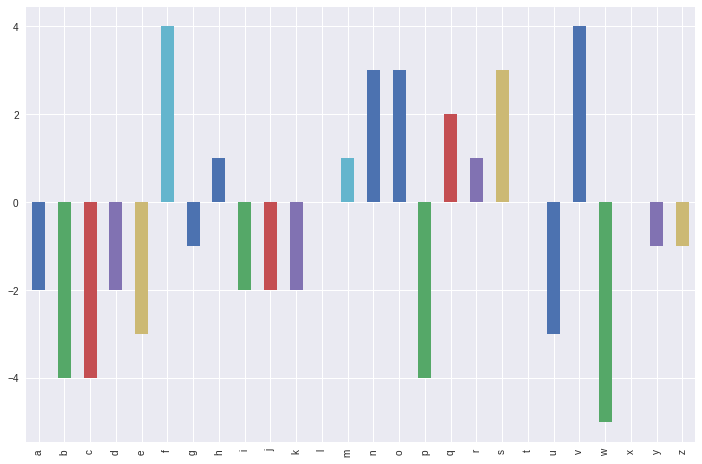

In [14]:
s1.plot(kind="bar")

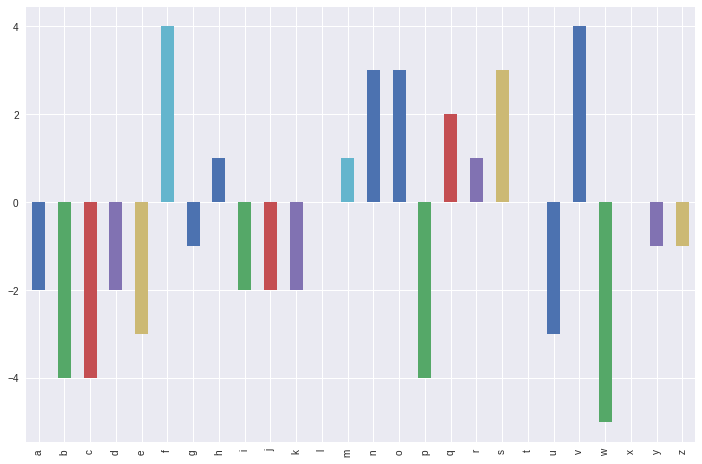

In [15]:
s1.plot.bar()

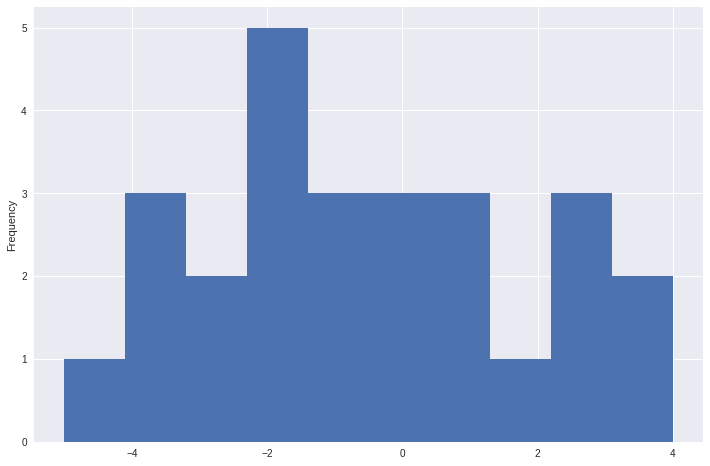

In [16]:
s1.plot(kind="hist")

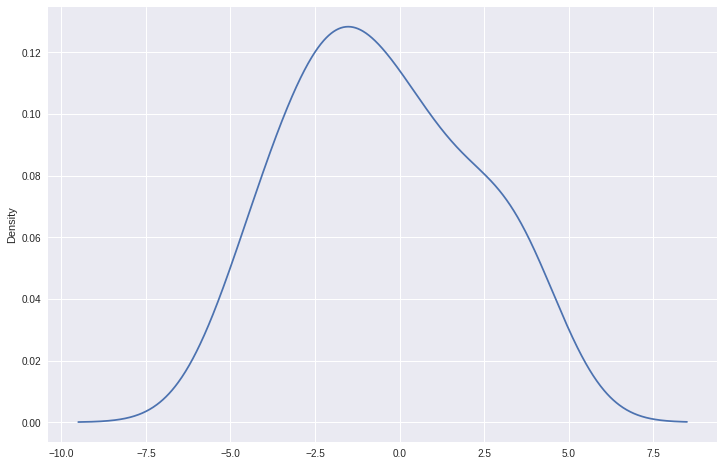

In [17]:
s1.plot(kind="density")

**Attention** on peut chainer les méthodes car elles ne modifient par sur place la `Series` mais en renvoit une nouvelle.

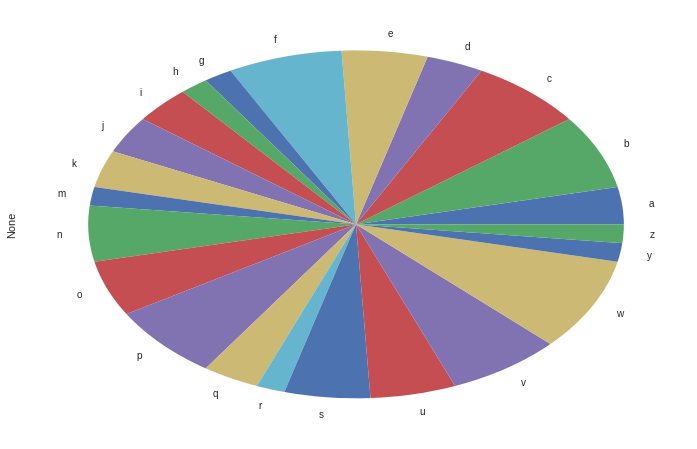

In [19]:
s1.apply(np.abs).plot(kind="pie")

Les graphiques sont en fait générés par `matplotlib` on peut donc utiliser les deux conjointement.

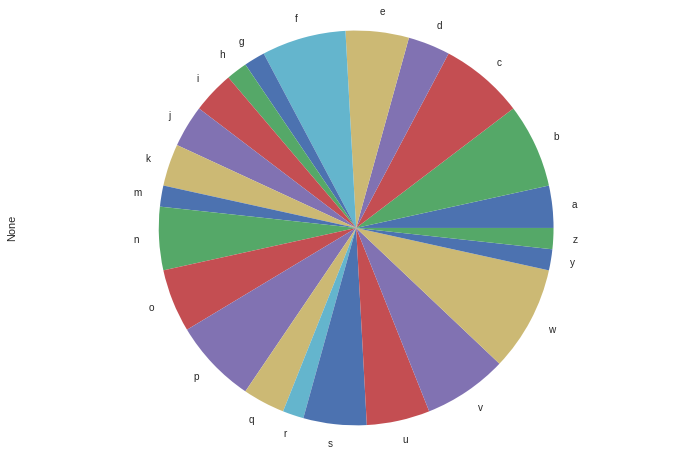

In [20]:
s1.apply(np.abs).plot(kind="pie")
plt.axis("equal");

On peut aussi composer différents graphiques de la façon suivante.

Text(0.5,1,'Barres horizontales')

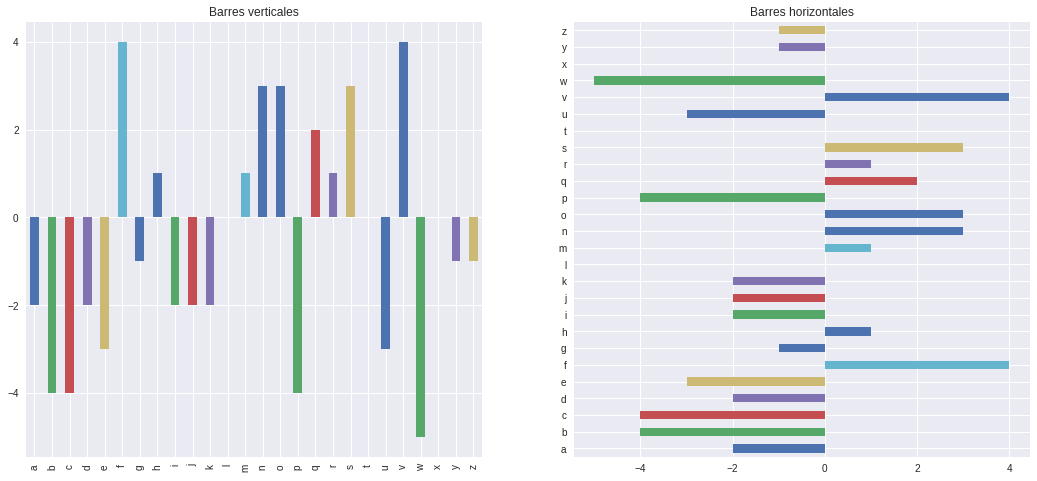

In [22]:
fig, (ax_g, ax_d) = plt.subplots(1, 2, figsize=(18, 8))
s1.plot(kind="bar", ax=ax_g)
ax_g.set_title("Barres verticales")
s1.plot(kind="barh", ax=ax_d)
ax_d.set_title("Barres horizontales")

# Manipulations de chaines de caractères

In [25]:
petit_texte = """
Ceci est juste un petit texte,
il va nous permettre de voir comment manipuler les chaines de caractères.
On verra qu'en plus des méthodes sur le type "str", on peut utiliser le module 're'.
"""
print(petit_texte)


Ceci est juste un petit texte,
il va nous permettre de voir comment manipuler les chaines de caractères.
On verra qu'en plus des méthodes sur le type "str", on peut utiliser le module 're'.



On peut déjà séparer un texte en une liste de lignes.

In [26]:
lignes = petit_texte.splitlines()
print(lignes)

['', 'Ceci est juste un petit texte,', 'il va nous permettre de voir comment manipuler les chaines de caractères.', 'On verra qu\'en plus des méthodes sur le type "str", on peut utiliser le module \'re\'.']


Si on veut séparer ensuite les mots, on peut procéder de la façon suivante.

In [27]:
mots = list()
for ligne in lignes:
    for mot in ligne.split():
        mots.append(mot)

In [28]:
print(mots)

['Ceci', 'est', 'juste', 'un', 'petit', 'texte,', 'il', 'va', 'nous', 'permettre', 'de', 'voir', 'comment', 'manipuler', 'les', 'chaines', 'de', 'caractères.', 'On', 'verra', "qu'en", 'plus', 'des', 'méthodes', 'sur', 'le', 'type', '"str",', 'on', 'peut', 'utiliser', 'le', 'module', "'re'."]


On aurait aussi plus procéder de manière plus succinte avec une compréhension de listes. (On va en plus se débarasser des majuscules)

In [30]:
liste_de_mots = [mot.lower() for ligne in petit_texte.splitlines() for mot in ligne.split()]
print(liste_de_mots)

['ceci', 'est', 'juste', 'un', 'petit', 'texte,', 'il', 'va', 'nous', 'permettre', 'de', 'voir', 'comment', 'manipuler', 'les', 'chaines', 'de', 'caractères.', 'on', 'verra', "qu'en", 'plus', 'des', 'méthodes', 'sur', 'le', 'type', '"str",', 'on', 'peut', 'utiliser', 'le', 'module', "'re'."]


On veut maintenant se débarasser de la ponctuation. On va pour cela utiliser les [expressions régulières](https://fr.wikipedia.org/wiki/Expression_r%C3%A9guli%C3%A8re) qui en `python` sont dans le module `re`.

In [31]:
import re

**Attention** comme il y a des caractères spéciaux [.+ etc..., on les préfixes par un backslash lorsque on veut juste le caractère lui même.

Les crochets signifient que l'on recherche l'un des caractères indiqués entre.

In [32]:
motif = re.compile("[\.;,\"']")

In [33]:
test0 = "chaine sans aucun des caractères recherchés"
test1 = "chaine, avec \" différents caractères; que l'on recherche."

On peut d'abord rechercher la présence du motif dans une chaine de caractères.

In [34]:
re.search(motif, test0)

In [35]:
re.search(motif, test1)

<_sre.SRE_Match object; span=(6, 7), match=','>

On peut aussi faire des remplacements

In [36]:
re.sub(motif, "REMPLACEMENT", test0)

'chaine sans aucun des caractères recherchés'

In [37]:
re.sub(motif, "REMPLACEMENT", test1)

'chaineREMPLACEMENT avec REMPLACEMENT différents caractèresREMPLACEMENT que lREMPLACEMENTon rechercheREMPLACEMENT'

On verra durant le semestre d'autres utilisations plus sophistiquées.